In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
path = '/Users/alenapominova/Downloads/Customer-Churn-Records.csv'
df = pd.read_csv(path)

In [15]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [17]:
isexited = df['Exited'].value_counts(normalize=True)*100
print(isexited)

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64


<Axes: >

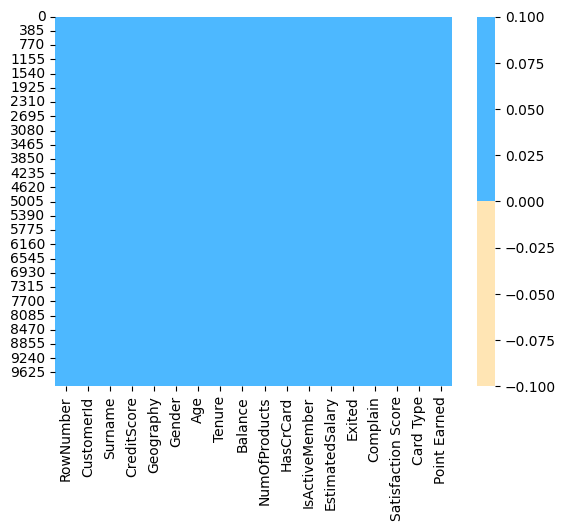

In [18]:
import seaborn as sns
columns = df.columns
colors = ['#FFE5B4','#4DB8FF']
sns.heatmap(df[columns].isnull(),cmap = sns.color_palette(colors))

In [19]:
print(df.shape)
df_cleaned = df.loc[~df.duplicated(),:].reset_index(drop=True)
print(df_cleaned.shape)

(10000, 18)
(10000, 18)


<Axes: >

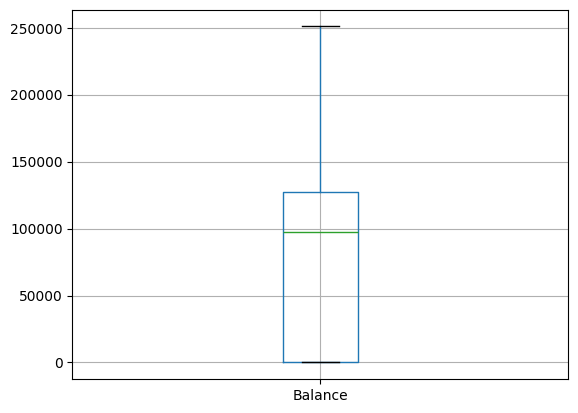

In [20]:
df.boxplot(column='Balance')

In [21]:
zero_balance = df[df.Balance == 0]
print(len(zero_balance))

3617


In [22]:
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(['RowNumber','CustomerId'],axis=1)
corr_matrix = numeric_df.corr()
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.004799,-0.002893


Обнаружена сильная корреляция между полями Exited и Complain. Построим линейный график зависимости между этими полями

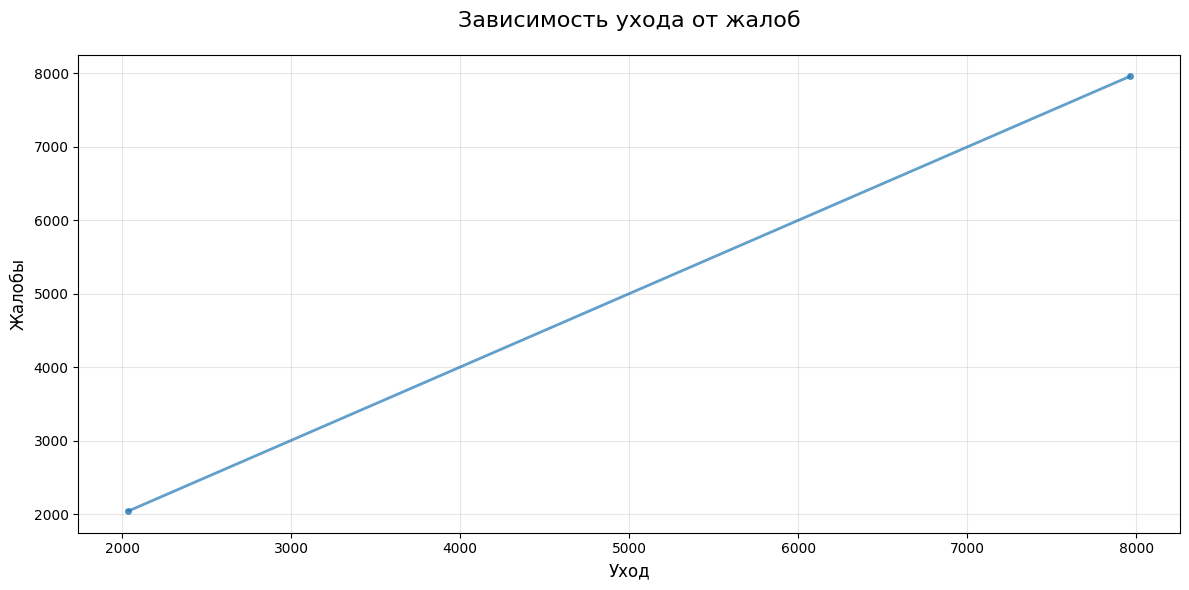

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df['Exited'].value_counts(), df['Complain'].value_counts(), 
         marker='o',            
         linestyle='-',         
         linewidth=2,          
         markersize=4,         
         alpha=0.7)             

plt.title('Зависимость ухода от жалоб', fontsize=16, pad=20)
plt.xlabel('Уход', fontsize=12)
plt.ylabel('Жалобы', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Complain     0     1
Exited              
0         7952    10
1            4  2034


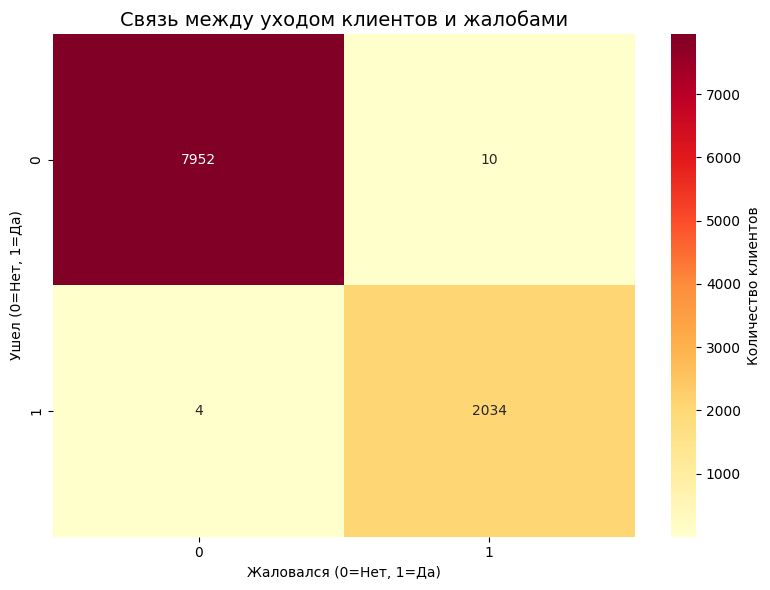

In [31]:
cross_tab = pd.crosstab(df['Exited'], df['Complain'])
print(cross_tab)
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, 
            annot=True, 
            fmt='d',
            cmap='YlOrRd',
            cbar_kws={'label': 'Количество клиентов'})

plt.title('Связь между уходом клиентов и жалобами', fontsize=14)
plt.xlabel('Жаловался (0=Нет, 1=Да)')
plt.ylabel('Ушел (0=Нет, 1=Да)')
plt.tight_layout()
plt.show()

In [34]:
print(f"Exit rate of complained: {2034 / 2044 * 100  }")
print(f"Exit rate of non-complained: {4 / 7956 * 100}")

Exit rate of complained: 99.51076320939335
Exit rate of non-complained: 0.050276520864756154


Вывод: не удаётся удержать 99,5% клиентов с жалобами, значит следует разобрать этот вопрос подробнее. Гипотеза: чем больше жалоб, тем больше клиентов уходит.

От чего вообще могут зависеть жалобы?

In [43]:
key = ['Complain','Gender','Age','Geography','Tenure','Balance','NumOfProducts','IsActiveMember','Satisfaction Score']
key_corr = pd.get_dummies(df[key])
client_corr = key_corr.corr()
client_corr['Complain']

Complain              1.000000
Gender               -0.106287
Age                   0.283530
Tenure               -0.013047
Balance               0.119124
NumOfProducts        -0.046357
IsActiveMember       -0.154741
Satisfaction Score   -0.004799
Geography_France     -0.105570
Geography_Germany     0.175122
Geography_Spain      -0.053596
Name: Complain, dtype: float64

Вывод: так как все корреляции слабые, необходим более глубокий анализ

Как выглядят клиенты, которые обычно жалуются?

In [60]:
complained_clients = df[df.Complain == 1].groupby('Gender').describe()
print(f"Age\n\n {complained_clients.Age}")
print(f"\nTenure\n\n {complained_clients.Tenure}")
print(f"\nBalance\n\n {complained_clients.Balance}")
print(f"\nNumOfProducts\n\n {complained_clients.NumOfProducts}")
print(f"\nSatisfaction Score\n\n {complained_clients['Satisfaction Score']}")


Age

          count       mean       std   min   25%   50%   75%   max
Gender                                                           
0       1142.0  44.753940  9.898957  19.0  38.0  45.0  51.0  84.0
1        902.0  44.831486  9.598279  18.0  38.0  45.0  51.0  71.0

Tenure

          count      mean       std  min  25%  50%   75%   max
Gender                                                       
0       1142.0  4.933450  2.958513  0.0  2.0  5.0  7.75  10.0
1        902.0  4.944568  2.908373  0.0  2.0  5.0  8.00  10.0

Balance

          count          mean           std  min        25%         50%  \
Gender                                                                   
0       1142.0  89023.352338  58592.786669  0.0      0.000  108052.205   
1        902.0  93842.208448  57828.193823  0.0  63737.285  111310.710   

                75%        max  
Gender                          
0       130860.8100  238387.56  
1       132270.3025  250898.09  

NumOfProducts

          count 

Вывод: И для мужчин, и для женщин категории клиентов которые жалуются очень похожи:
-клиенты зрелого возраста (приблизительно 45 лет)
-достаточно давно с компанией (приблизительно 5 лет)
-имеют в среднем высокий баланс (приблизительно 100000+)
-имеют мало продуктов банка  (1)
-имеют средний уровень удовлетворённости(3)

Теперь обратим внимание на "типичного" клиента, который уходит, и сравним характеристики с "типичным" клиентом, который жалуется 

In [67]:
exited_clients = df[df.Exited == 1].groupby(['Gender','Complain']).describe()
print(f"Age\n\n {exited_clients.Age}")
print(f"\nTenure\n\n {exited_clients.Tenure}")
print(f"\nBalance\n\n {exited_clients.Balance}")
print(f"\nNumOfProducts\n\n {exited_clients.NumOfProducts}")
print(f"\nSatisfaction Score\n\n {exited_clients['Satisfaction Score']}")


Age

                   count       mean        std   min    25%   50%    75%   max
Gender Complain                                                              
0      0            2.0  39.500000  12.020815  31.0  35.25  39.5  43.75  48.0
       1         1137.0  44.794195   9.900021  19.0  38.00  45.0  51.00  84.0
1      0            2.0  49.000000  12.727922  40.0  44.50  49.0  53.50  58.0
       1          897.0  44.890747   9.583240  18.0  38.00  45.0  51.00  71.0

Tenure

                   count      mean       std  min   25%  50%   75%   max
Gender Complain                                                        
0      0            2.0  3.500000  2.121320  2.0  2.75  3.5  4.25   5.0
       1         1137.0  4.935796  2.957789  0.0  2.00  5.0  8.00  10.0
1      0            2.0  5.000000  5.656854  1.0  3.00  5.0  7.00   9.0
       1          897.0  4.936455  2.910376  0.0  2.00  5.0  8.00  10.0

Balance

                   count           mean            std       min          

Выводы: люди, которые ушли из компании имеют схожие черты, независимо от того, были ли жалобы или нет.
Необходимо рассмотреть каждый аспект из описания "типичного" ушедшего клиента

  Geography  Gender  count
0    France       1   2753
1    France       0   2261
2   Germany       1   1316
3   Germany       0   1193
4     Spain       1   1388
5     Spain       0   1089


/var/folders/89/ycs16kw13g18nxwvtl9gvfnw0000gn/T/ipykernel_47290/2041158666.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


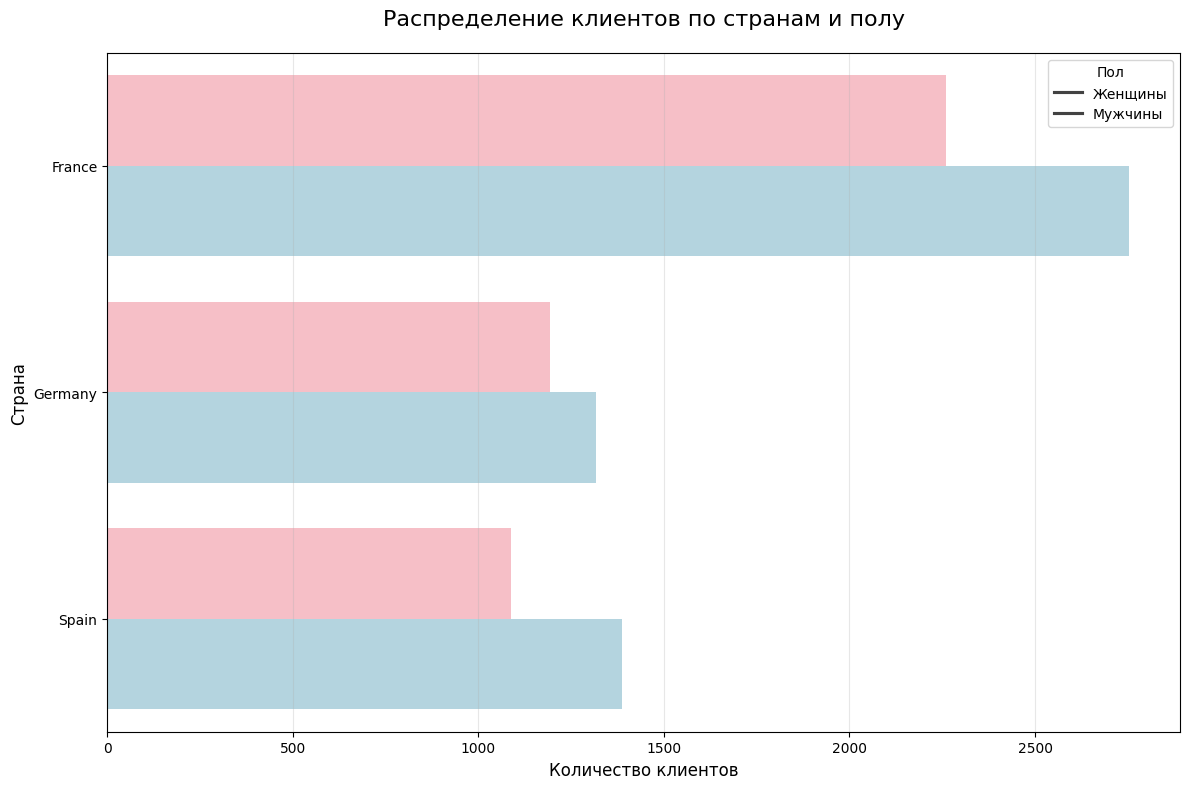

In [23]:

df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
gender_country = df.groupby('Geography')['Gender'].value_counts().reset_index()
print(gender_country)
plt.figure(figsize=(12, 8))

sns.barplot(data=gender_country, 
            y='Geography', 
            x='count', 
            hue='Gender',
            palette=['lightpink', 'lightblue'],
            orient='h')

plt.title('Распределение клиентов по странам и полу', fontsize=16, pad=20)
plt.ylabel('Страна', fontsize=12)
plt.xlabel('Количество клиентов', fontsize=12)
plt.legend(title='Пол', labels=['Женщины', 'Мужчины'])
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


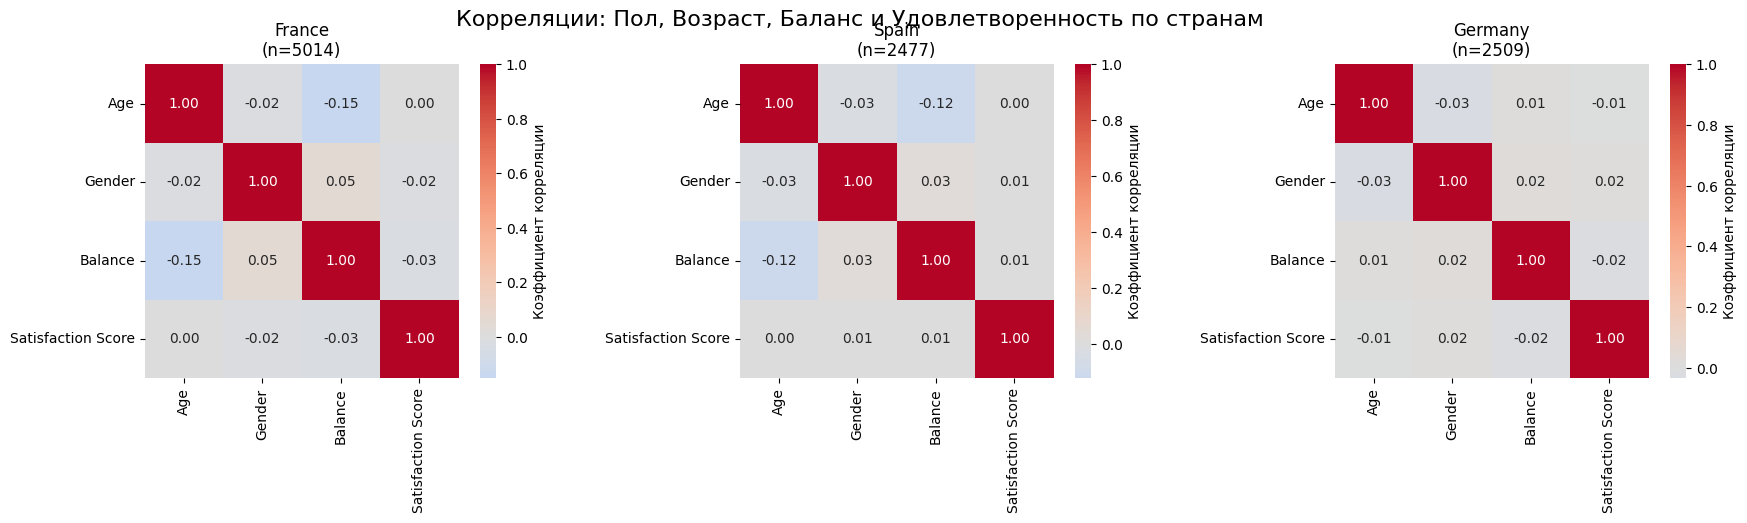

In [26]:
France_corr = []
Spain_corr = []
Germany_corr = []
countries = df['Geography'].unique()
fig, axes = plt.subplots(1, len(countries), figsize=(18, 5))
for i,country in enumerate(countries):
    country_data = df[df.Geography == country]
    sat_level = country_data.groupby(['Age','Gender','Balance'])['Satisfaction Score'].mean().reset_index()
    corr_data = pd.get_dummies(sat_level)
    if country == "France":
        France_corr = corr_data.corr()
    elif country == "Spain":
        Spain_corr = corr_data.corr()
    else:
        Germany_corr = corr_data.corr()
    sns.heatmap(corr_data.corr(), 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                square=True,
                ax=axes[i],
                cbar_kws={'label': 'Коэффициент корреляции'})
    
    axes[i].set_title(f'{country}\n(n={len(country_data)})')

plt.suptitle('Корреляции: Пол, Возраст, Баланс и Удовлетворенность по странам', fontsize=16)
plt.tight_layout()
plt.show()
    
    